<a href="https://colab.research.google.com/github/PatrykCiwinski/Final_project_NLP/blob/main/Final_project_v2_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import GRU, SimpleRNN, LSTM, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [3]:
from sklearn.metrics import classification_report,confusion_matrix

# Loading datasets

In [4]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from google.colab import files

!gdown --id 1VyDjoSGEbwC_5iCHoeBJQgJSsDxosYly

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1VyDjoSGEbwC_5iCHoeBJQgJSsDxosYly
To: /content/train.csv
100% 29.1M/29.1M [00:00<00:00, 195MB/s]


In [6]:
!gdown --id 1NZaNaYKEE_RrKbH-ohRQIW0mJuZJT5R5

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1NZaNaYKEE_RrKbH-ohRQIW0mJuZJT5R5
To: /content/test.csv
100% 1.83M/1.83M [00:00<00:00, 149MB/s]


In [7]:
test_data = pd.read_csv("/content/test.csv",encoding='utf8')
train_data = pd.read_csv("/content/train.csv",encoding='utf8')

# Get to know with datasets

In [8]:
train_data.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [9]:
test_data.head()

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  120000 non-null  int64 
 1   Title        120000 non-null  object
 2   Description  120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class Index  7600 non-null   int64 
 1   Title        7600 non-null   object
 2   Description  7600 non-null   object
dtypes: int64(1), object(2)
memory usage: 178.2+ KB


#Joining Title and Description columns

In [12]:
train_data['text'] = train_data['Title'] + ' ' + train_data['Description']
test_data['text'] = test_data['Title'] + ' ' + test_data['Description']

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  120000 non-null  int64 
 1   Title        120000 non-null  object
 2   Description  120000 non-null  object
 3   text         120000 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.7+ MB


In [14]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class Index  7600 non-null   int64 
 1   Title        7600 non-null   object
 2   Description  7600 non-null   object
 3   text         7600 non-null   object
dtypes: int64(1), object(3)
memory usage: 237.6+ KB


In [15]:
train_data = train_data.drop(columns=['Title', 'Description'])
test_data = test_data.drop(columns=['Title', 'Description'])

In [16]:
train_data.head()

,Class Index,text
0,3,Wall St. Bears Claw Back Into the Black (Reute...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...
4,3,"Oil prices soar to all-time record, posing new..."


In [17]:
test_data.head()

,Class Index,text
0,3,Fears for T N pension after talks Unions repre...
1,4,The Race is On: Second Private Team Sets Launc...
2,4,Ky. Company Wins Grant to Study Peptides (AP) ...
3,4,Prediction Unit Helps Forecast Wildfires (AP) ...
4,4,Calif. Aims to Limit Farm-Related Smog (AP) AP...


In [18]:
labels = {1:'World News', 2:'Sports News', 3:'Business News', 4:'Science-Technology News'}

In [19]:
train_data['label'] = train_data['Class Index'].map(labels)
test_data['label'] = test_data['Class Index'].map(labels)


In [20]:
train_data.head()

,Class Index,text,label
0,3,Wall St. Bears Claw Back Into the Black (Reute...,Business News
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Business News
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters...,Business News
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Business News
4,3,"Oil prices soar to all-time record, posing new...",Business News


In [21]:
train_data['text'][0]

"Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again."

# Text cleaning

In [22]:
def clean(text):
    text = re.sub('\[.*?\]', '', text) # special chars del
    text = re.sub('https?://\S+|www\.\S+', '', text) # URLs del
    text = re.sub('<.*?>+', '', text) # HTML tags del
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # punctuation signs del
    text = re.sub('\n', '', text) # new line signs del
    text = re.sub('\w*\d\w*', '', text) # whitespaces and digits del
    text = re.sub('  ', ' ', text)
    return text

In [23]:
train_data['text'] = train_data['text'].apply(lambda x:clean(x))
test_data['text'] = test_data['text'].apply(lambda x:clean(x))

<Axes: xlabel='label'>

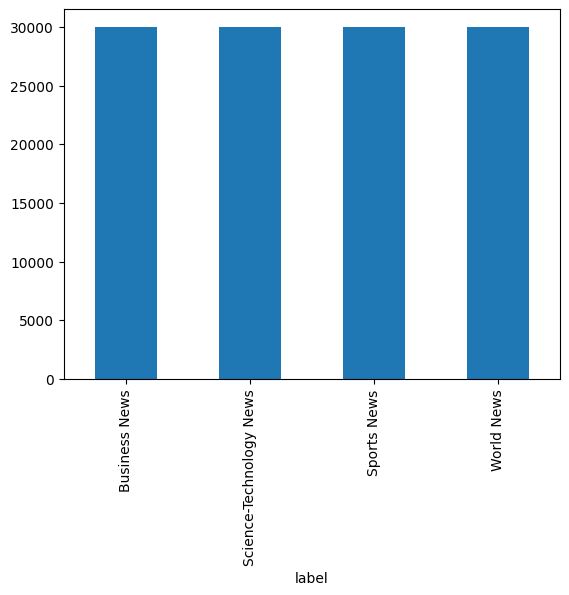

In [24]:
(train_data.groupby(['label']).size()).plot(kind='bar')

#Countvectorizer and TfIdF - pipeline model on SVC

In [25]:
vec = CountVectorizer(stop_words='english', lowercase=True)
bag_of_words = vec.fit_transform(train_data[train_data['label']=='Sports News']['text'])
sum_words = bag_of_words.sum(axis=0)

In [26]:
bag_of_words2 = vec.fit_transform(train_data[train_data['label']=='Business News']['text'])
sum_words2 = bag_of_words2.sum(axis=0)

In [27]:
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

In [28]:
words_freq2 = [(word, sum_words2[0, idx]) for word, idx in vec.vocabulary_.items()]

In [29]:
bag_of_words3 = vec.fit_transform(train_data[train_data['label']=='World News']['text'])
sum_words3 = bag_of_words3.sum(axis=0)

In [30]:
words_freq3 = [(word, sum_words3[0, idx]) for word, idx in vec.vocabulary_.items()]

In [31]:
bag_of_words4 = vec.fit_transform(train_data[train_data['label']=='Science-Technology News']['text'])
sum_words4 = bag_of_words4.sum(axis=0)

In [32]:
words_freq4 = [(word, sum_words4[0, idx]) for word, idx in vec.vocabulary_.items()]

In [33]:
sorted(words_freq, key=lambda x:x[1], reverse=True)[:30]

[('andes', 6247),
 ('northernexport', 4109),
 ('fuelinventories', 3647),
 ('wiring', 3447),
 ('tenyear', 3261),
 ('sharply', 3157),
 ('nucor', 2986),
 ('wrap', 2956),
 ('crohn', 2751),
 ('violate', 2649),
 ('lehnyse', 2637),
 ('targetstocksquickinfofullquotegtericbstltagt', 2366),
 ('cluttered', 2297),
 ('legitimacy', 2095),
 ('seen', 2039),
 ('stripping', 1956),
 ('sherry', 1811),
 ('stillstimulative', 1772),
 ('toclear', 1749),
 ('relents', 1720),
 ('yumn', 1699),
 ('rimto', 1678),
 ('fuller', 1655),
 ('feet', 1642),
 ('ordinaries', 1625),
 ('welch', 1621),
 ('youre', 1606),
 ('sidney', 1602),
 ('frances', 1582),
 ('flooding', 1542)]

In [34]:
sorted(words_freq2, key=lambda x:x[1], reverse=True)[:30]

[('said', 7230),
 ('reuters', 6897),
 ('new', 6556),
 ('oil', 6224),
 ('prices', 4201),
 ('company', 4095),
 ('percent', 3362),
 ('york', 3304),
 ('corp', 2988),
 ('million', 2822),
 ('profit', 2794),
 ('sales', 2760),
 ('stocks', 2694),
 ('monday', 2588),
 ('wednesday', 2540),
 ('tuesday', 2514),
 ('billion', 2483),
 ('thursday', 2451),
 ('friday', 2309),
 ('year', 2272),
 ('shares', 2272),
 ('group', 1997),
 ('yesterday', 1949),
 ('market', 1841),
 ('href', 1819),
 ('business', 1816),
 ('dollar', 1789),
 ('lta', 1775),
 ('bank', 1756),
 ('earnings', 1753)]

In [35]:
sorted(words_freq3, key=lambda x:x[1], reverse=True)[:30]

[('said', 7661),
 ('ap', 5754),
 ('iraq', 5424),
 ('reuters', 5405),
 ('president', 4172),
 ('new', 3452),
 ('afp', 3383),
 ('minister', 3308),
 ('killed', 3160),
 ('people', 2827),
 ('government', 2532),
 ('iraqi', 2399),
 ('prime', 2344),
 ('bush', 2308),
 ('baghdad', 2188),
 ('monday', 2135),
 ('security', 2089),
 ('police', 2060),
 ('wednesday', 2034),
 ('says', 2033),
 ('thursday', 2004),
 ('officials', 1950),
 ('friday', 1950),
 ('tuesday', 1927),
 ('leader', 1897),
 ('palestinian', 1893),
 ('nuclear', 1891),
 ('sunday', 1880),
 ('talks', 1870),
 ('yesterday', 1870)]

In [36]:
sorted(words_freq4, key=lambda x:x[1], reverse=True)[:30]

[('new', 7093),
 ('microsoft', 4823),
 ('ap', 3681),
 ('said', 3603),
 ('software', 3588),
 ('reuters', 3263),
 ('internet', 3198),
 ('company', 2606),
 ('space', 2307),
 ('search', 2218),
 ('computer', 2149),
 ('security', 2144),
 ('service', 2122),
 ('music', 2095),
 ('technology', 2079),
 ('online', 2034),
 ('web', 1987),
 ('ibm', 1898),
 ('mobile', 1749),
 ('corp', 1740),
 ('google', 1728),
 ('world', 1714),
 ('windows', 1654),
 ('users', 1630),
 ('apple', 1613),
 ('announced', 1608),
 ('million', 1555),
 ('year', 1503),
 ('market', 1484),
 ('phone', 1402)]

In [37]:
X_train=train_data['text']
y_train=train_data['label']

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [39]:
tfidf=TfidfVectorizer()
svc=LinearSVC()

In [ ]:
pipe=Pipeline([('tfidf',TfidfVectorizer()),('svc',LinearSVC())])

In [41]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [42]:
X_test=test_data['text']
y_test=test_data['label']

In [43]:
preds=pipe.predict(X_test)

In [44]:
cr = classification_report(y_test,preds)

In [45]:
print(cr)

                         precision    recall  f1-score   support

          Business News       0.89      0.89      0.89      1900
Science-Technology News       0.90      0.90      0.90      1900
            Sports News       0.95      0.98      0.97      1900
             World News       0.94      0.91      0.92      1900

               accuracy                           0.92      7600
              macro avg       0.92      0.92      0.92      7600
           weighted avg       0.92      0.92      0.92      7600



In [46]:
cm=confusion_matrix(y_test,preds)

<Axes: >

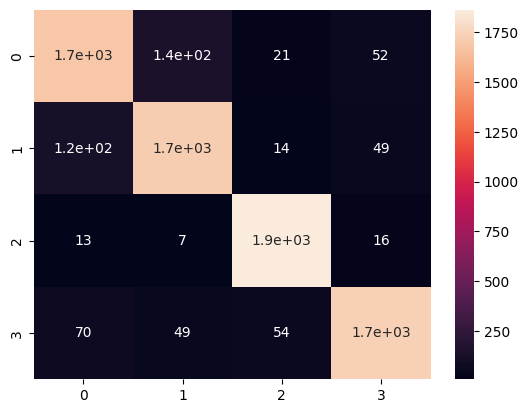

In [47]:
sns.heatmap(cm,annot=True)

In [48]:
pipe.predict(["A group of saboteurs"])[0]

'World News'

#Cosine similarity
-To check what articles ( 5 ) are simillar to given title

In [49]:
tfidf2 = TfidfVectorizer(max_features=120000)

In [50]:
test_data2 = pd.read_csv("/content/test.csv",encoding='utf8')
train_data2 = pd.read_csv("/content/train.csv",encoding='utf8')

In [51]:
train_data2['label'] = train_data2['Class Index'].map(labels)
test_data2['label'] = test_data2['Class Index'].map(labels)

In [52]:
test_data2

,Class Index,Title,Description,label
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...,Business News
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o...",Science-Technology News
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...,Science-Technology News
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...,Science-Technology News
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...,Science-Technology News
...,...,...,...,...
7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...,World News
7596,2,Void is filled with Clement,With the supply of attractive pitching options...,Sports News
7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...,Sports News
7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...,Business News


In [53]:
x=tfidf2.fit_transform(train_data2['Description'])

In [54]:
x

<120000x60734 sparse matrix of type '<class 'numpy.float64'>'
	with 3321861 stored elements in Compressed Sparse Row format>

In [55]:
doc_to_idx = pd.Series(train_data2.index, index=train_data2['Title'])

In [56]:
doc_to_idx

Title
Wall St. Bears Claw Back Into the Black (Reuters)                                 0
Carlyle Looks Toward Commercial Aerospace (Reuters)                               1
Oil and Economy Cloud Stocks' Outlook (Reuters)                                   2
Iraq Halts Oil Exports from Main Southern Pipeline (Reuters)                      3
Oil prices soar to all-time record, posing new menace to US economy (AFP)         4
                                                                              ...  
Pakistan's Musharraf Says Won't Quit as Army Chief                           119995
Renteria signing a top-shelf deal                                            119996
Saban not going to Dolphins yet                                              119997
Today's NFL games                                                            119998
Nets get Carter from Raptors                                                 119999
Length: 120000, dtype: int64

In [57]:
idx= doc_to_idx['Saban not going to Dolphins yet']

In [58]:
x[idx]

<1x60734 sparse matrix of type '<class 'numpy.float64'>'
	with 34 stored elements in Compressed Sparse Row format>

In [59]:
query = x[idx]

In [60]:
scores =cosine_similarity(x,query).flatten()

In [61]:
labeled_idx = (-scores).argsort()[0]

In [62]:
train_data2['label'].iloc[labeled_idx]

'Sports News'

In [63]:
def labeled(title:str):
  idx= doc_to_idx[title]
  query = x[idx]
  scores =(cosine_similarity(x,query)).flatten()
  label_idx = (-scores).argsort()[1:6]
  title_label = train_data2[['Title','label']].iloc[label_idx]
  return title_label

In [64]:
labeled("Saban not going to Dolphins yet")

,Title,label
119432,Dolphins plan to interview minority candidate;...,Sports News
119399,Dolphins to Interview Minority Candidate (AP),Sports News
119445,Saban Still Top Choice,Sports News
119691,Wait a minute,Sports News
116887,Dolphins appear interested in LSU #39;s Saban,Sports News


##RNN

In [65]:
train_data

,Class Index,text,label
0,3,Wall St Bears Claw Back Into the Black Reuters...,Business News
1,3,Carlyle Looks Toward Commercial Aerospace Reut...,Business News
2,3,Oil and Economy Cloud Stocks Outlook Reuters R...,Business News
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Business News
4,3,Oil prices soar to alltime record posing new m...,Business News
...,...,...,...
119995,1,Pakistans Musharraf Says Wont Quit as Army Chi...,World News
119996,2,Renteria signing a topshelf deal Red Sox gener...,Sports News
119997,2,Saban not going to Dolphins yet The Miami Dolp...,Sports News
119998,2,Todays NFL games PITTSBURGH at NY GIANTS Time ...,Sports News


In [66]:
K = train_data['Class Index'].max() +1

In [67]:
Vocab_size = 2000
tokenizer = Tokenizer(num_words=Vocab_size)
tokenizer.fit_on_texts(train_data['text'])
sequences_train=tokenizer.texts_to_sequences(train_data['text'])
sequences_test=tokenizer.texts_to_sequences(test_data['text'])

In [68]:
# word to integer mapping
word2idx = tokenizer.word_index
V = len(word2idx)

In [69]:
# now we need to create matrix out of sequencces lists
data_train=pad_sequences(sequences_train)

T = data_train.shape[1]

data_test=pad_sequences(sequences_test, maxlen=T)

In [70]:
Emm_dim= 24

In [110]:
i= Input(shape=(T,))
x= Embedding(V,Emm_dim)(i)
x= LSTM(64, return_sequences=True)(x)
x= LSTM(32, return_sequences=True)(x)
x= GlobalMaxPooling1D()(x)
x= Dense(K)(x)

model=Model(i,x)

In [111]:
model.compile(loss=SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

In [112]:
es= EarlyStopping(monitor='val_accuracy', patience=2)

In [113]:
history = model.fit(data_train,train_data['Class Index'],epochs=20,batch_size=224
                    ,callbacks=[es],
                    validation_data=(data_test,test_data['Class Index']))

Epoch 1/20
536/536 [==============================] - 35s 57ms/step - loss: 1.1661 - accuracy: 0.4423 - val_loss: 0.7110 - val_accuracy: 0.7300
Epoch 2/20
536/536 [==============================] - 10s 20ms/step - loss: 0.4138 - accuracy: 0.8603 - val_loss: 0.3435 - val_accuracy: 0.8833
Epoch 3/20
536/536 [==============================] - 10s 18ms/step - loss: 0.3214 - accuracy: 0.8901 - val_loss: 0.3281 - val_accuracy: 0.8884
Epoch 4/20
536/536 [==============================] - 8s 15ms/step - loss: 0.3013 - accuracy: 0.8955 - val_loss: 0.3132 - val_accuracy: 0.8945
Epoch 5/20
536/536 [==============================] - 9s 17ms/step - loss: 0.2892 - accuracy: 0.8998 - val_loss: 0.3133 - val_accuracy: 0.8920
Epoch 6/20
536/536 [==============================] - 9s 17ms/step - loss: 0.2818 - accuracy: 0.9019 - val_loss: 0.3112 - val_accuracy: 0.8941


In [114]:
predictions=model.predict(data_test)

238/238 [==============================] - 2s 5ms/step


In [115]:
predictions

array([[-6.9274106 ,  1.4188907 , -3.6517992 ,  3.6255476 , -0.11511874],
       [-7.9992943 , -1.3274548 , -2.2406259 , -0.35183892,  3.765343  ],
       [-7.390577  , -0.41688925, -2.1317794 , -0.5720854 ,  3.8863182 ],
       ...,
       [-6.4971857 ,  0.18144488,  4.116201  , -1.9113452 , -1.5093541 ],
       [-5.365437  ,  1.8836241 , -1.4733998 ,  1.518847  ,  0.7717961 ],
       [-6.7901425 , -1.5426538 , -4.252715  ,  2.2643187 ,  3.306461  ]],
      dtype=float32)

In [116]:
preds=np.argmax(predictions, axis=1)

In [117]:
print(classification_report(test_data['Class Index'],preds))

              precision    recall  f1-score   support

           1       0.91      0.89      0.90      1900
           2       0.95      0.95      0.95      1900
           3       0.85      0.87      0.86      1900
           4       0.87      0.87      0.87      1900

    accuracy                           0.89      7600
   macro avg       0.89      0.89      0.89      7600
weighted avg       0.89      0.89      0.89      7600



In [118]:
sequence=tokenizer.texts_to_sequences(['war in Poland has escalated'])
text_to_predict=pad_sequences(sequence)

In [119]:
predictions=model.predict(text_to_predict)

1/1 [==============================] - 1s 738ms/step


In [120]:
preds=np.argmax(predictions, axis=1)

In [121]:
labels[preds[0]]

'World News'

In [128]:
def text_to_predict(text):
  sequence=tokenizer.texts_to_sequences([text])
  text=pad_sequences(sequence)
  predictions=model.predict(text)
  preds=np.argmax(predictions, axis=1)
  return labels[preds[0]]

In [129]:
text_to_predict('war in Poland')

1/1 [==============================] - 0s 26ms/step


'World News'